**Randomly choose 20% of observations from "train_labels.csv"**

In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train_data.csv')
train_labels = pd.read_csv('train_labels.csv')

# 20% sample of train_labels.csv
sample_train_labels = train_labels.sample(frac=0.2, random_state=1)
sample_train_lables.head()

**Merge this sample with “train_data.csv”**

In [ ]:
# 20% sample of train_data.csv
sample_train_data = pd.merge(sample_train_labels, train_data,on='customer_ID',how='inner')
sample_train_data.head()

sample_train_data.to_csv('sample_train_data.csv', index=False)

**Explore the data. Data Size, data type of features, a snapshot of data**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_train_data.csv')

# Data size
print(f"Data Size: {df.shape}")

# data type of features
print(f"Data Types:\n{df.dtypes}")

#head
print(df.head())
print(f"Snapshot:\n{df.head()}")

Data Size: (1106, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
                                         customer_ID  target         S_2  \
0  19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...       0  2017-08-08   
1  afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...       0  2018-03-16   
2  019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...       0  2017-12-20   
3  fb6c8e102405adf305c505a54e665a47d0b713f56a4915...       1  2017-11-26   
4  20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...       0  2017-10-30   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.952106  0.006830  0.007750  0.817398  0.000341       NaN  0.002549  ...   
1  0.838285  0.003378  0.009451  0.818851  0.001573       NaN  0.002

In [3]:
# Convert 'S_2' column to datetime
df['S_2'] = pd.to_datetime(df['S_2'])

In [4]:
df['S_2'].head()

0   2017-08-08
1   2018-03-16
2   2017-12-20
3   2017-11-26
4   2017-10-30
Name: S_2, dtype: datetime64[ns]

**Imputing the missing values**

*Number of misssing values*

In [5]:
missing_values = df.isnull().sum()
print("Missing Values Count: \n", missing_values)

Missing Values Count: 
 customer_ID      0
target           0
S_2              0
P_2              7
D_39             0
              ... 
D_141           18
D_142          916
D_143           18
D_144            6
D_145           18
Length: 191, dtype: int64


*Replace numerical columns with mean and categorical columns with mode*

In [6]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
    
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())

In [7]:
missing_values = df.isnull().sum()
print("Missing Values Count: \n", missing_values)

Missing Values Count: 
 customer_ID    0
target         0
S_2            0
P_2            0
D_39           0
              ..
D_141          0
D_142          0
D_143          0
D_144          0
D_145          0
Length: 191, dtype: int64


**One-Hot Encoding**

In [8]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [9]:
# Get the names of new columns created after encoding
new_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print the names of the new columns
print(new_columns)


['B_30_0.0', 'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0', 'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0', 'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0']


In [10]:
df_encoded.to_csv('df_encoded.csv', index=False)

In [11]:
df2 = pd.read_csv('df_encoded.csv')
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...,0,2017-08-08,0.952106,0.006830,0.007750,0.817398,0.000341,0.217330,0.002549,...,0,0,1,0,0,0,0,0,0,1
1,afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...,0,2018-03-16,0.838285,0.003378,0.009451,0.818851,0.001573,0.217330,0.002360,...,0,0,1,0,0,0,0,0,1,0
2,019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...,0,2017-12-20,0.850569,0.302643,0.018813,1.008960,0.000978,0.132243,0.002743,...,0,0,1,0,0,0,0,0,0,1
3,fb6c8e102405adf305c505a54e665a47d0b713f56a4915...,1,2017-11-26,0.446003,0.000986,0.114735,0.076269,0.001983,0.350972,0.001733,...,1,0,1,0,0,0,0,0,1,0
4,20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...,0,2017-10-30,0.651073,0.622973,0.130193,0.266888,0.518292,0.165631,0.002417,...,0,0,1,0,0,0,0,0,0,1


In [12]:
print(df2.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=224)


**Defining new features**

In [13]:
df2['S_2'] = pd.to_datetime(df2['S_2'])
end_date = df2['S_2'].max()

# Date ranges
last_3_months = end_date - pd.DateOffset(months=3)
last_6_months = end_date - pd.DateOffset(months=6)
last_9_months = end_date - pd.DateOffset(months=9)
last_12_months = end_date - pd.DateOffset(months=12)

# Exclusion categorical columns
exclusion_list = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'S_2']
columns_to_include = [col for col in df2.columns if not col.startswith(tuple(exclusion_list))]

# New features
df2['S_Total'] = df2[columns_to_include].filter(like='S_').sum(axis=1)
df2['P_Total'] = df2[columns_to_include].filter(like='P_').sum(axis=1)
df2['B_Total'] = df2[columns_to_include].filter(like='B_').sum(axis=1)
df2['R_Total'] = df2[columns_to_include].filter(like='R_').sum(axis=1)
df2['D_Ave'] = df2[columns_to_include].filter(like='D_').mean(axis=1)
df2['S_Ave'] = df2[columns_to_include].filter(like='S_').mean(axis=1)
df2['P_Ave'] = df2[columns_to_include].filter(like='P_').mean(axis=1)
df2['B_Ave'] = df2[columns_to_include].filter(like='B_').mean(axis=1)
df2['R_Ave'] = df2[columns_to_include].filter(like='R_').mean(axis=1)
df2['S_Ave_3_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['S_Ave_6_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['S_Ave_9_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['S_Ave_12_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_12_months].mean(axis=1)
df2['P_Ave_3_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['P_Ave_6_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['P_Ave_9_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['P_Ave_12_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_12_months].mean(axis=1)
df2['R_Ave_3_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['R_Ave_6_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['R_Ave_9_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['R_Ave_12_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_12_months].mean(axis=1)
df2['B_Ave_3_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['B_Ave_6_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['B_Ave_9_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['B_Ave_12_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_12_months].mean(axis=1)
df2['D_Ave_3_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['D_Ave_6_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['D_Ave_9_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['D_Ave_12_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_12_months].mean(axis=1)


In [14]:
print(df2)

                                            customer_ID  target        S_2  \
0     19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...       0 2017-08-08   
1     afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...       0 2018-03-16   
2     019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...       0 2017-12-20   
3     fb6c8e102405adf305c505a54e665a47d0b713f56a4915...       1 2017-11-26   
4     20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...       0 2017-10-30   
...                                                 ...     ...        ...   
1101  982106b8b7c2628d4f09a882643661a202b4bcf8bf4cfa...       1 2017-07-14   
1102  40a9928cea9880d517398ec6fdc736e7535fe6663f02b3...       0 2018-03-31   
1103  71248f965b357a76ff05e962914abbdb7d3c0cb94cf2b5...       0 2017-07-10   
1104  94853b18179ff80a65b253c92b0e4275db1d2f63bce074...       0 2017-07-22   
1105  784b2970a958963d0d3a4b40fb2a84b778c80ef63316da...       0 2018-01-02   

           P_2      D_39       B_1       B_2       R_1       S_

In [15]:
print(df2.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'R_Ave_9_months', 'R_Ave_12_months', 'B_Ave_3_months', 'B_Ave_6_months',
       'B_Ave_9_months', 'B_Ave_12_months', 'D_Ave_3_months', 'D_Ave_6_months',
       'D_Ave_9_months', 'D_Ave_12_months'],
      dtype='object', length=253)


**Splitting the data**

**XGBoost setup**

In [16]:
!pip install xgboost

**XGBoost model with default parameters**

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into Train, Test1, and Test2
X = df2.drop(columns=['customer_ID', 'target', 'S_2'])
y = df2['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an XGBClassifier with default parameters
xgb_default = xgb.XGBClassifier(use_label_encoder=False)

# Fit the model to the training data
xgb_default.fit(X_train, y_train)

# Make predictions on Test1
y_pred_test1 = xgb_default.predict(X_test1)

# Calculate accuracy on Test1
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)

# Make predictions on Test2
y_pred_test2 = xgb_default.predict(X_test2)

# Calculate accuracy on Test2
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)

# Print the accuracies on Test1 and Test2
print("Accuracy on Test1:", accuracy_test1)
print("Accuracy on Test2:", accuracy_test2)


Accuracy on Test1: 0.8313253012048193
Accuracy on Test2: 0.8614457831325302


**Feature Importance-XGBoost model with default parameters**

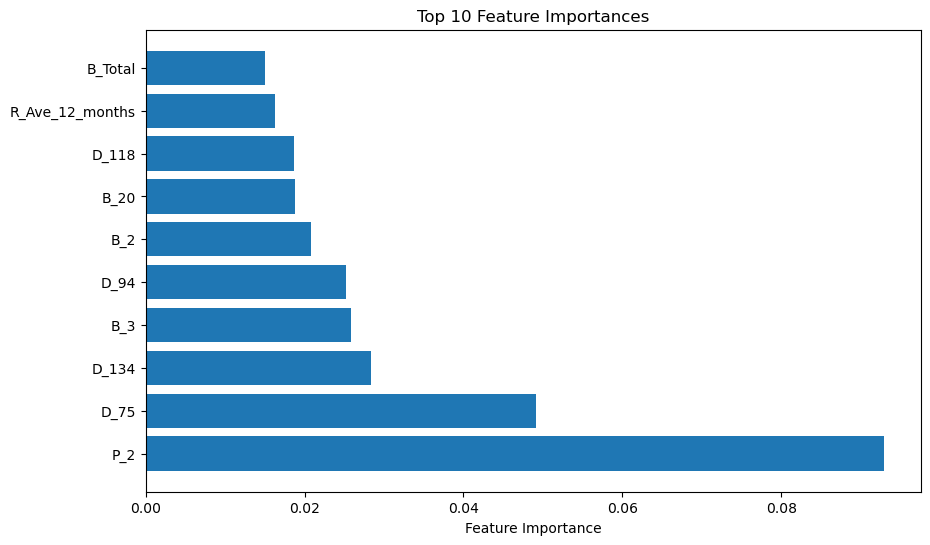

In [18]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = xgb_default.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
xgb_feature_importance_default_model = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_default_model['Feature'][:10], xgb_feature_importance_default_model['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


In [19]:
xgb_feature_importance_default_model.head()

,Feature,Importance
0,P_2,0.092909
71,D_75,0.049118
165,D_134,0.028304
7,B_3,0.025789
119,D_94,0.025185


**XGBoost model with given parameters**

In [20]:
import xgboost as xgb

# Create an XGBClassifier with the specified parameters
xgb_given_parameters = xgb.XGBClassifier(
    n_estimators=300,           # Number of trees
    learning_rate=0.5,          # Learning rate
    max_depth=4,                # Maximum depth of trees
    subsample=0.5,              # Fraction of observations to build each tree
    colsample_bytree=0.5,       # Fraction of features to build each tree
    use_label_encoder=False,    # Avoid label encoding warning
    scale_pos_weight=5          # Weight of default observations
)

# Fit the model to the training data
xgb_given_parameters.fit(X_train, y_train)

# Make predictions on Test1
y_pred_test1_given_params = xgb_given_parameters.predict(X_test1)

# Calculate accuracy on Test1
accuracy_test1_given_params = accuracy_score(y_test1, y_pred_test1_given_params)

# Make predictions on Test2
y_pred_test2_given_params = xgb_given_parameters.predict(X_test2)

# Calculate accuracy on Test2
accuracy_test2_given_params = accuracy_score(y_test2, y_pred_test2_given_params)

# Print the accuracies on Test1 and Test2 for the given parameters
print("Accuracy on Test1 with given parameters:", accuracy_test1_given_params)
print("Accuracy on Test2 with given parameters:", accuracy_test2_given_params)


Accuracy on Test1 with given parameters: 0.8192771084337349
Accuracy on Test2 with given parameters: 0.8493975903614458


**Feature Importances -XGBoost model with given parameters**

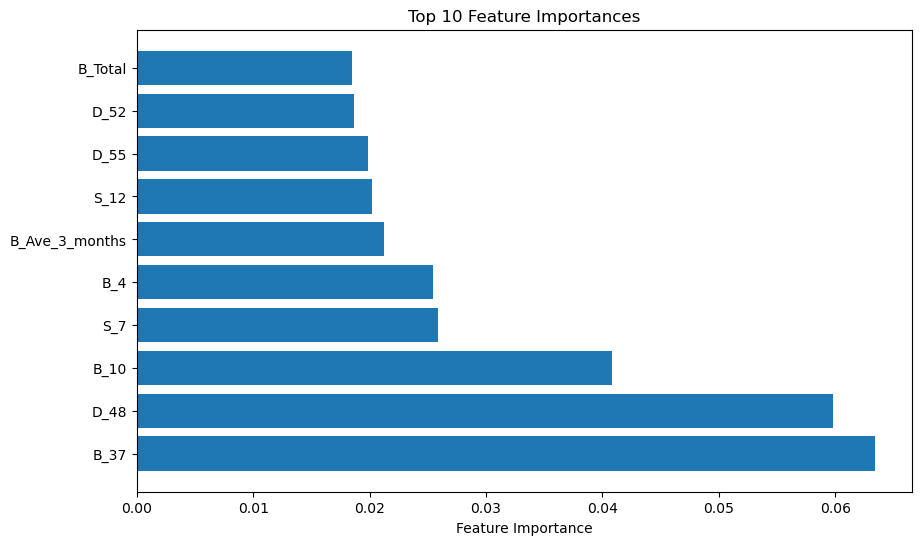

In [21]:
# Get feature importances
feature_importance = xgb_given_parameters.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
xgb_feature_importance_given_parameters_model = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_given_parameters_model['Feature'][:10], xgb_feature_importance_given_parameters_model['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


In [22]:
xgb_feature_importance_given_parameters_model.head()

,Feature,Importance
135,B_37,0.063389
17,D_48,0.059775
28,B_10,0.040815
35,S_7,0.025914
11,B_4,0.025459


*Bar plot for feature importances*

**Selected Features with > 0.5 Feature Importance**

In [23]:
# Filter features with importance > 0.5% from the default model
selected_features_default = xgb_feature_importance_default_model[xgb_feature_importance_default_model['Importance'] > 0.005]

# Filter features with importance > 0.5% from the given parameters model
selected_features_given_parameters = xgb_feature_importance_given_parameters_model[xgb_feature_importance_given_parameters_model['Importance'] > 0.005]

# Concatenate the selected features from both models
Selected_Features = pd.concat([selected_features_default, selected_features_given_parameters], axis=0).drop_duplicates(subset='Feature')

# Reset the index of the selected features DataFrame
Selected_Features.reset_index(drop=True, inplace=True)

# Sort the Selected_Features DataFrame by importance in descending order
Selected_Features = Selected_Features.sort_values(by='Importance', ascending=False)


In [24]:
# Save the selected_features_df_values to a CSV file
Selected_Features.to_csv('Selected_Features.csv', index=False)

In [25]:
Selected_Features

,Feature,Importance
0,P_2,0.092909
62,B_37,0.063389
63,D_48,0.059775
1,D_75,0.049118
64,B_10,0.040815
...,...,...
59,B_Ave_9_months,0.005246
60,R_28,0.005149
61,S_12,0.005126
104,D_70,0.005101


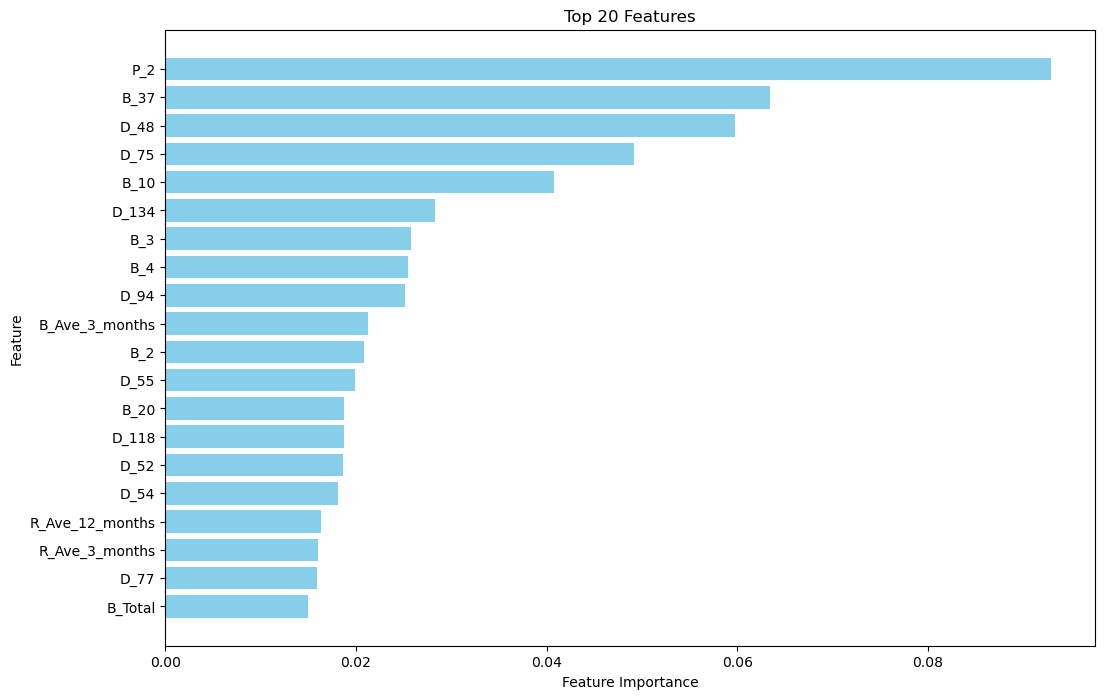

In [26]:

# Select the top 20 features
top_20_features = Selected_Features.head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features')
plt.gca().invert_yaxis()  # Reverse the order to display the most important at the top
plt.show()


In [27]:
df2

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,R_Ave_9_months,R_Ave_12_months,B_Ave_3_months,B_Ave_6_months,B_Ave_9_months,B_Ave_12_months,D_Ave_3_months,D_Ave_6_months,D_Ave_9_months,D_Ave_12_months
0,19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...,0,2017-08-08,0.952106,0.006830,0.007750,0.817398,0.000341,0.217330,0.002549,...,0.086062,0.086062,NaN,NaN,0.135581,0.135581,NaN,NaN,0.220955,0.220955
1,afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...,0,2018-03-16,0.838285,0.003378,0.009451,0.818851,0.001573,0.217330,0.002360,...,0.085890,0.085890,0.169696,0.169696,0.169696,0.169696,0.200995,0.200995,0.200995,0.200995
2,019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...,0,2017-12-20,0.850569,0.302643,0.018813,1.008960,0.000978,0.132243,0.002743,...,0.085483,0.085483,NaN,0.152239,0.152239,0.152239,NaN,0.167951,0.167951,0.167951
3,fb6c8e102405adf305c505a54e665a47d0b713f56a4915...,1,2017-11-26,0.446003,0.000986,0.114735,0.076269,0.001983,0.350972,0.001733,...,0.100723,0.100723,NaN,0.161539,0.161539,0.161539,NaN,0.222348,0.222348,0.222348
4,20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...,0,2017-10-30,0.651073,0.622973,0.130193,0.266888,0.518292,0.165631,0.002417,...,0.129447,0.129447,NaN,0.194320,0.194320,0.194320,NaN,0.272485,0.272485,0.272485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,982106b8b7c2628d4f09a882643661a202b4bcf8bf4cfa...,1,2017-07-14,0.319138,0.715330,0.115719,0.044145,0.504295,0.483726,0.006918,...,0.111909,0.111909,NaN,NaN,0.227321,0.227321,NaN,NaN,0.242563,0.242563
1102,40a9928cea9880d517398ec6fdc736e7535fe6663f02b3...,0,2018-03-31,0.510783,0.353735,0.047859,1.000810,0.007733,0.043515,0.009784,...,0.060291,0.060291,0.196545,0.196545,0.196545,0.196545,0.214322,0.214322,0.214322,0.214322
1103,71248f965b357a76ff05e962914abbdb7d3c0cb94cf2b5...,0,2017-07-10,0.975702,0.001245,0.012763,0.993044,0.005897,0.160437,0.004931,...,0.086428,0.086428,NaN,NaN,0.138111,0.138111,NaN,NaN,0.193896,0.193896
1104,94853b18179ff80a65b253c92b0e4275db1d2f63bce074...,0,2017-07-22,0.917180,0.009148,0.003619,0.844280,0.009020,0.297457,0.003553,...,0.086548,0.086548,NaN,NaN,0.127531,0.127531,NaN,NaN,0.240975,0.240975


**df3 = only with selected features**

In [28]:
# List of columns to include in df3
columns_to_include = ["customer_ID", "target", "S_2"] + list(Selected_Features["Feature"])

# Create df3 by selecting the specified columns from df2
df3 = df2[columns_to_include]


**Grid Search for the XGBoost model (using only chosen features) with given parameters**

*Setup*

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

X = df3.drop(['customer_ID','S_2','target'], axis=1)
y = df3['target']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)



In [30]:
# Grid parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

*Fit the model*

In [31]:
# XGBClassifier object
xgb_gridsearch = XGBClassifier(use_label_encoder=False)

# GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_gridsearch, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [32]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [33]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming you've already created the 'grid_search' object

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['# Trees', 'LR', 'Subsample %', 'Features', '% Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search.cv_results_['params']):
    
    # Fit model with current parameters
    xgb_gridsearch.set_params(**params)
    xgb_gridsearch.fit(X_train, y_train)
    
    # Predict probabilities for each set
    train_pred = xgb_gridsearch.predict_proba(X_train)[:, 1]
    test1_pred = xgb_gridsearch.predict_proba(X_test1)[:, 1]
    test2_pred = xgb_gridsearch.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        '# Trees': [params['n_estimators']],
        'LR': [params['learning_rate']],
        'Subsample %': [f'{params["subsample"] * 100}%'],
        'Features': [f'{params["colsample_bytree"] * 100}%'],
        '% Weight of Default': [params['scale_pos_weight']],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('grid_search_XGBoost.csv', index=False)
results_df


,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.982135,0.872645,0.920833
1,50,0.01,80.0%,50.0%,1,0.994394,0.885145,0.913294
2,50,0.01,50.0%,50.0%,5,0.984066,0.883152,0.915675
3,50,0.01,80.0%,50.0%,5,0.995412,0.886594,0.916468
4,50,0.01,50.0%,50.0%,10,0.979337,0.890580,0.916667
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,1.000000,0.892754,0.924405
68,300,0.10,50.0%,100.0%,5,1.000000,0.895290,0.926786
69,300,0.10,80.0%,100.0%,5,1.000000,0.898913,0.924603
70,300,0.10,50.0%,100.0%,10,1.000000,0.893841,0.910913


**Slide 8 : XGBoost - Grid Search - Scatter plots for models of grid search**

In [34]:
import numpy as np

AUC_AVG = (results_df['AUC Train'] + results_df['AUC Test 1'] + results_df['AUC Test 2']) / 3
AUC_SD = []
for i in range(72):
    AUC_SD.append(np.std([results_df['AUC Train'][i], results_df['AUC Test 1'][i], results_df['AUC Test 2'][i]]))

results_df['AUC AVG'] = AUC_AVG
results_df['AUC SD'] = AUC_SD


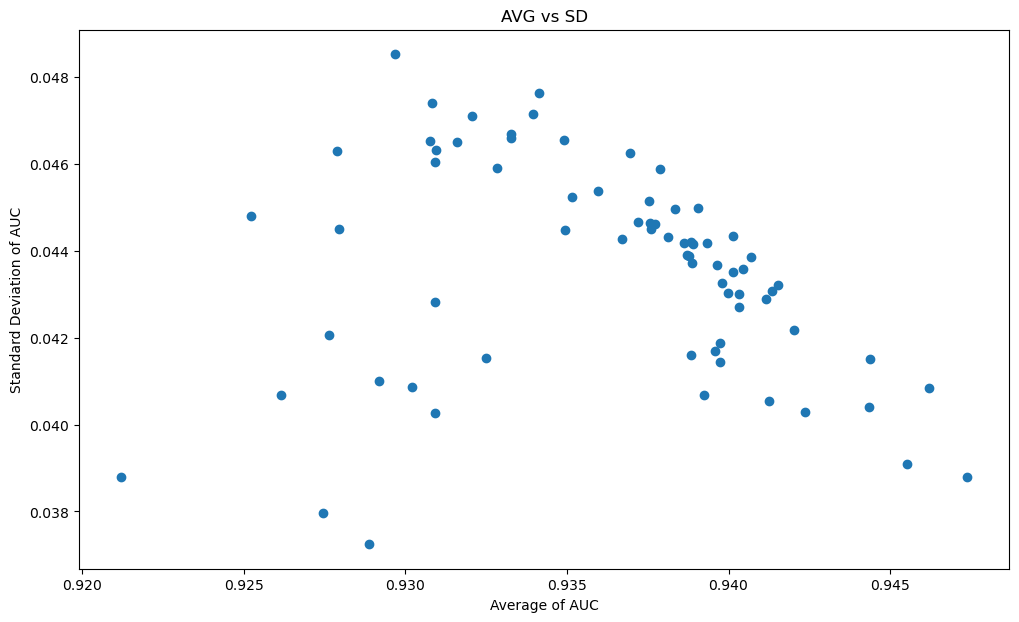

In [35]:
plt.figure(figsize=(12, 7))
plt.scatter(results_df['AUC AVG'], results_df['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'AVG vs SD'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


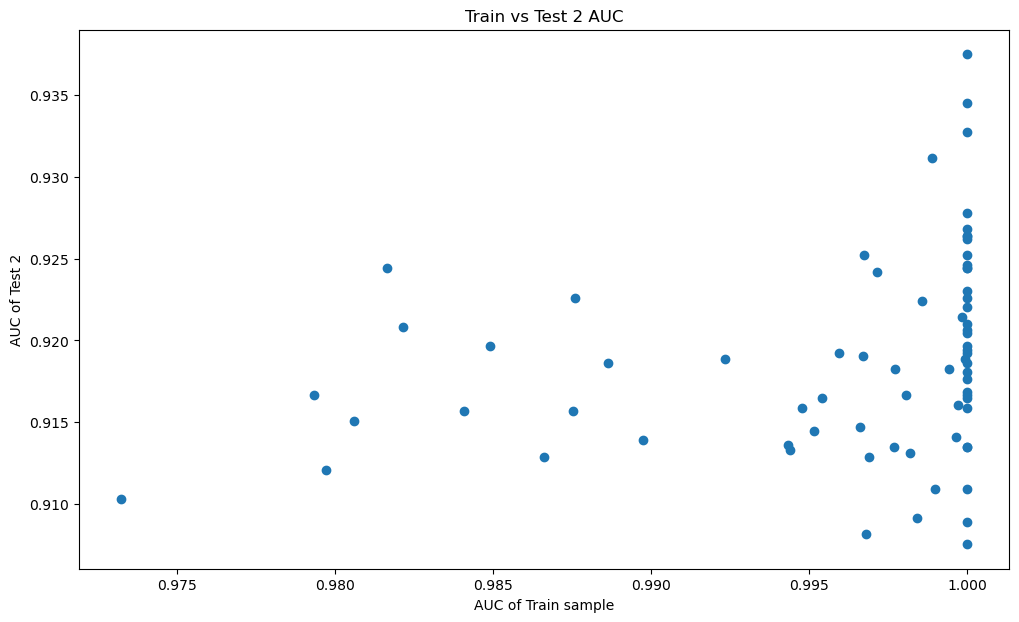

In [36]:
plt.figure(figsize=(12, 7))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train vs Test 2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


**####  wronnggg#####Choose the best model, based on bias and variance ; Re-run the model with optimum parameters**

In [37]:
# Find the row with the highest average AUC
best_model_xgb = results_df.loc[results_df['AUC AVG'].idxmax()]

best_model_params = {
    'n_estimators': best_model_xgb['# Trees'],
    'learning_rate': best_model_xgb['LR'],
    'subsample': float(best_model_xgb['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_xgb['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_xgb['% Weight of Default']
}

# Print information about the best model
print("Best Model Parameters:")
print(best_model_xgb)


Best Model Parameters:
# Trees                      50
LR                          0.1
Subsample %               80.0%
Features                 100.0%
% Weight of Default          10
AUC Train                   1.0
AUC Test 1             0.907609
AUC Test 2             0.934524
AUC AVG                0.947378
AUC SD                 0.038798
Name: 59, dtype: object


**Re-run the model with optimum parameters**

In [38]:
xgb_best_model = XGBClassifier(**best_model_params)
xgb_best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
xgb_best_model.predict(X_train)[:5]

array([1, 0, 0, 0, 0])

In [40]:
xgb_best_model.predict_proba(X_train)[:5]

array([[0.01644868, 0.9835513 ],
       [0.97487205, 0.02512796],
       [0.878204  , 0.12179601],
       [0.99254143, 0.00745855],
       [0.96159685, 0.03840314]], dtype=float32)

*Save to file*

In [41]:
xgb_best_model.save_model('xgb_best_model.json')

**ScoreBins**

*Slide 9 - Define score bins based on the train sample, and apply the same thresholds to test samples. Show rank orderings in a Bar-Chart, where each sample is one series in Bar Chart, X-Axis shows score bins (intervals), and Y-Axis shows default rate in each bin.*

AUC on Train: 1.0
AUC on Test 1: 0.9076086956521738
AUC on Test 2: 0.9345238095238094


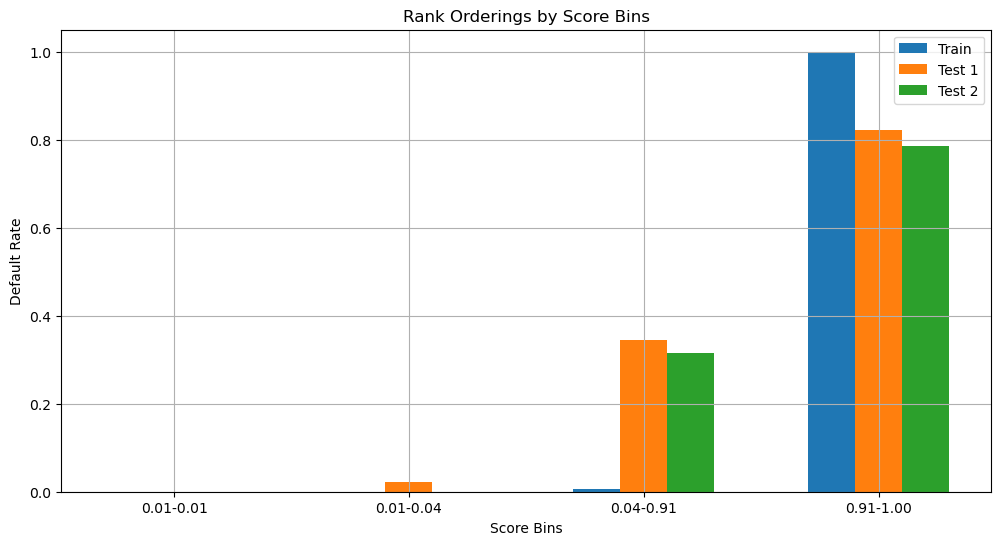

In [42]:
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC on each sample
auc_train = roc_auc_score(y_train, xgb_best_model.predict_proba(X_train)[:, 1])
auc_test1 = roc_auc_score(y_test1, xgb_best_model.predict_proba(X_test1)[:, 1])
auc_test2 = roc_auc_score(y_test2, xgb_best_model.predict_proba(X_test2)[:, 1])

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = xgb_best_model.predict_proba(X_train)[:, 1]
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Apply the same thresholds to test samples
test1_scores = xgb_best_model.predict_proba(X_test1)[:, 1]
test2_scores = xgb_best_model.predict_proba(X_test2)[:, 1]

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
   default_rates = []
   for i in range(len(bins) - 1):
       mask = (scores >= bins[i]) & (scores <= bins[i + 1])
       if np.sum(mask) > 0:
           default_rate = np.sum(y[mask]) / np.sum(mask)
           default_rates.append(default_rate)
       else:
           default_rates.append(0.0)
   return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)

# Modify the x-axis labels to include the values of the score bins
x_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Create a figure for the bar chart
plt.figure(figsize=(12, 6))

# Plot the default rates for different samples in the respective score bins
width = 0.2
x_indexes = np.arange(len(x_labels))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

# Set labels, title, and x-axis ticks
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, x_labels)  # Use modified x_labels

# Add a legend, grid, and display the plot
plt.legend()
plt.grid(True)
plt.show()


The score bins in the code are created based on percentiles of the scores from the training sample. The purpose of these bins is to divide the range of predicted scores into different groups to assess how well the model's predictions align with the likelihood of default or other outcomes.

**Slide 10. XGBoost – SHAP Analysis - Bee swarm graph**

Slide #10. XGBoost – SHAP Analysis. Show Beeswarm Graph for the final model, based on Test 2 sample. Add some explanation of your choice. You can talk about ranking of attributes, correlation between attribute and the output, …

In [43]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [44]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb_best_model)


[12:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [45]:
shap_values = explainer(X_test2)

In [46]:
shap_values

.values =
array([[ 0.8953896 , -0.03269028,  0.01230205, ...,  0.00591627,
         0.0040364 , -0.06195524],
       [ 0.9959559 ,  0.06626295,  0.12192621, ..., -0.00938109,
        -0.00386418,  0.01944572],
       [-2.4396546 , -0.00727365, -0.10425058, ..., -0.00890184,
        -0.01299951,  0.02926037],
       ...,
       [-2.4845402 , -0.01644215, -0.0880739 , ..., -0.00332133,
        -0.02793388, -0.01758408],
       [ 0.3923741 ,  0.00782599,  0.10766977, ..., -0.03787559,
        -0.02722384,  0.00396864],
       [-2.248468  , -0.00680166, -0.1295401 , ..., -0.00681503,
        -0.01590332,  0.00955983]], dtype=float32)

.base_values =
array([1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827,
       1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827,
       1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827,
       1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8237827,
       1.8237827, 1.8237827, 1.8237827, 1.8237827, 1.8

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


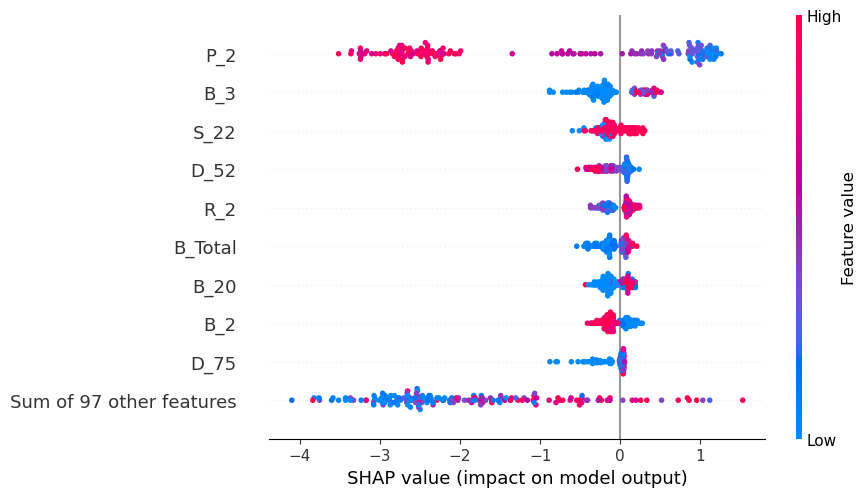

In [47]:
shap.plots.beeswarm(shap_values)

In [48]:
import pandas as pd
import numpy as np
import shap

# Assuming you have already created the explainer and computed shap_values
explainer = shap.Explainer(xgb_best_model)
shap_values = explainer(X_test2)

# Identify the top 5 features with the highest average SHAP values
feature_names = X_test2.columns
avg_shap_values = np.abs(shap_values.values).mean(axis=0)
top_features_idx = np.argsort(avg_shap_values)[-5:][::-1]
top_features = [feature_names[i] for i in top_features_idx]

# Calculate the requested summary statistics for the top features
summary_stats = []
for feature in top_features:
    feature_values = X_test2[feature]
    feature_values_no_na = feature_values.dropna()  # Handle missing values
    summary = [
        feature,
        feature_values_no_na.min(),
        np.percentile(feature_values_no_na, 1),
        np.percentile(feature_values_no_na, 5),
        np.median(feature_values_no_na),
        np.percentile(feature_values_no_na, 95),
        np.percentile(feature_values_no_na, 99),
        feature_values_no_na.max(),
        feature_values_no_na.mean(),
        100 * (len(X_test2) - len(feature_values_no_na)) / len(X_test2)  # Percent missing
    ]
    summary_stats.append(summary)

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(
    summary_stats,
    columns=["Feature", "Min", "1st Percentile", "5th Percentile", "Median", "95th Percentile", "99th Percentile", "Max", "Mean", "%Missing"]
)

print(summary_df)


  Feature       Min  1st Percentile  5th Percentile    Median  \
0     P_2 -0.012387        0.183190        0.287284  0.690272   
1     B_3  0.000061        0.000188        0.000913  0.009105   
2    S_22  0.004578        0.027743        0.296702  0.938516   
3    D_52 -0.001247        0.012477        0.027126  0.155793   
4     R_2  0.000057        0.000081        0.000557  0.005337   

   95th Percentile  99th Percentile       Max      Mean  %Missing  
0         0.955456         0.983974  1.006017  0.664858       0.0  
1         0.797059         0.999149  1.042058  0.153161       0.0  
2         0.982510         0.992818  1.008494  0.800440       0.0  
3         0.354499         0.470121  0.579479  0.163631       0.0  
4         0.009706         1.005864  1.008432  0.035048       0.0  


**Slide 11 :XGBoost – SHAP Analysis - Waterfall Graph**

Slide #11. XGBoost – SHAP Analysis. Show Waterfall Graph for the final model, based on one observation in Test 2 sample. Add some explanation of your choice. You can talk about which attributes are driving the score, how to improve the score, …

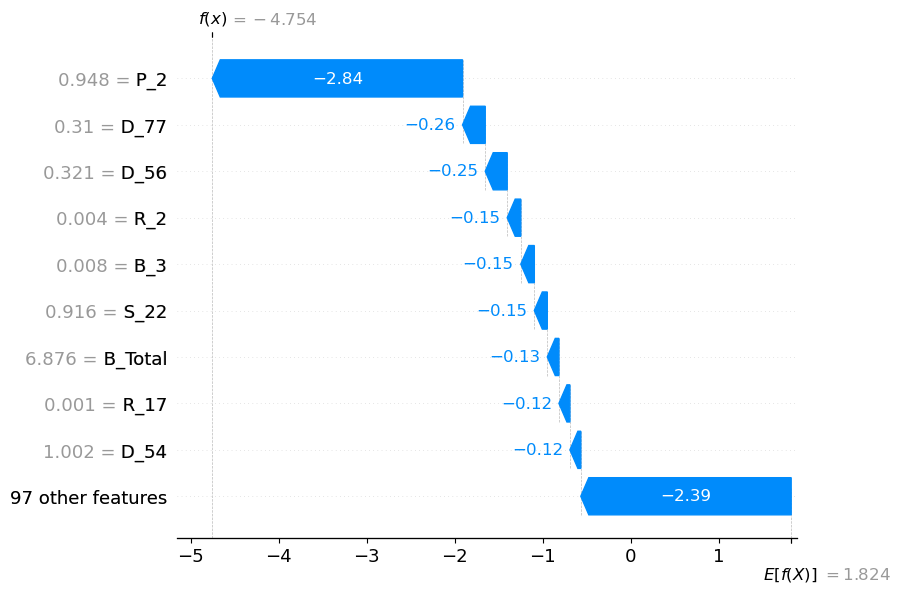

In [49]:
shap.plots.waterfall(shap_values[160])

**Neural Network**

**#Data Processing (We will use only features that we chose in step 10)**

In [50]:
df4=df3.copy()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Cap and floor observations at 1st and 99th percentiles (Train sample)
Q1 = df4.drop(["customer_ID", "S_2", "target"], axis=1).quantile(0.01)
Q99 = df4.drop(["customer_ID", "S_2", "target"], axis=1).quantile(0.99)
df4_capped = df4.drop(["customer_ID", "S_2", "target"], axis=1).clip(lower=Q1, upper=Q99, axis=1)

# Step 3: Replace missing values with 0
df4_capped = df4_capped.fillna(0)

# Step 2: Standardize (normalize) the data based on Mean and Standard Deviation from Train sample
scaler = StandardScaler()

# Fit the scaler on the Train sample data
scaler.fit(df4_capped)

# Transform the Train, Test1, and Test2 samples
X = df4_capped  # Use the capped and standardized data
y = df4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Apply the same scaling to all data subsets
X_train = scaler.transform(X_train)
X_test1 = scaler.transform(X_test1)
X_test2 = scaler.transform(X_test2)


In [52]:
import tensorflow as tf

In [53]:
results_df = pd.DataFrame(columns=['# HL', '# Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test1', 'AUC Test2'])

# Hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each combination of hyperparameters
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
                    for _ in range(n_layers):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Calculate ROC AUC scores for train, test1, and test2 sets
                    auc_train = roc_auc_score(y_train, model.predict(X_train))
                    auc_test1 = roc_auc_score(y_test1, model.predict(X_test1))
                    auc_test2 = roc_auc_score(y_test2, model.predict(X_test2))

                    # Create a DataFrame from the results
                    result_dict = {
                        '# HL': n_layers,
                        '# Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test1': auc_test1,
                        'AUC Test2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test1 AUC: {auc_test1}, Test2 AUC: {auc_test2}")

# Optionally, save the results to a CSV file after the entire grid search
results_df.to_csv('grid_search_results.csv', index=False)


6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.8988264470129754, Test1 AUC: 0.8663949275362319, Test2 AUC: 0.9128968253968253
6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.6903768655063991, Test1 AUC: 0.6401268115942029, Test2 AUC: 0.7328373015873016
6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9049864930693946, Test1 AUC: 0.879891304347826, Test2 AUC: 0.8964285714285714
6/6 [==============================] - 0s 1ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.5833178335769009, Test1 AUC: 0.6458333333333334, Test2 AUC: 0.614285714285

In [54]:
results_df

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test1,AUC Test2
0,2,4,relu,50%,100,0.898826,0.866395,0.912897
1,2,4,relu,50%,10000,0.690377,0.640127,0.732837
2,2,4,relu,0%,100,0.904986,0.879891,0.896429
3,2,4,relu,0%,10000,0.583318,0.645833,0.614286
4,2,4,tanh,50%,100,0.913033,0.895290,0.896627
5,2,4,tanh,50%,10000,0.679270,0.672645,0.732540
6,2,4,tanh,0%,100,0.924459,0.867754,0.870238
7,2,4,tanh,0%,10000,0.826217,0.861051,0.823611
8,2,6,relu,50%,100,0.842779,0.840308,0.853770
9,2,6,relu,50%,10000,0.756468,0.772101,0.702778


*Slide 14 - Plot the graphs*

In [55]:
AUC_AVG = (results_df['AUC Train'] + results_df['AUC Test1'] + results_df['AUC Test2']) / 3
AUC_SD = []
for i in range(32):
    AUC_SD.append(np.std([results_df['AUC Train'][i], results_df['AUC Test1'][i], results_df['AUC Test2'][i]]))
results_df['AUC AVG'] = AUC_AVG
results_df['AUC SD'] = AUC_SD


In [56]:
results_df

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test1,AUC Test2,AUC AVG,AUC SD
0,2,4,relu,50%,100,0.898826,0.866395,0.912897,0.892706,0.019471
1,2,4,relu,50%,10000,0.690377,0.640127,0.732837,0.687780,0.037893
2,2,4,relu,0%,100,0.904986,0.879891,0.896429,0.893769,0.010416
3,2,4,relu,0%,10000,0.583318,0.645833,0.614286,0.614479,0.025522
4,2,4,tanh,50%,100,0.913033,0.895290,0.896627,0.901650,0.008068
5,2,4,tanh,50%,10000,0.679270,0.672645,0.732540,0.694818,0.026810
6,2,4,tanh,0%,100,0.924459,0.867754,0.870238,0.887483,0.026165
7,2,4,tanh,0%,10000,0.826217,0.861051,0.823611,0.836960,0.017068
8,2,6,relu,50%,100,0.842779,0.840308,0.853770,0.845619,0.005851
9,2,6,relu,50%,10000,0.756468,0.772101,0.702778,0.743782,0.029689


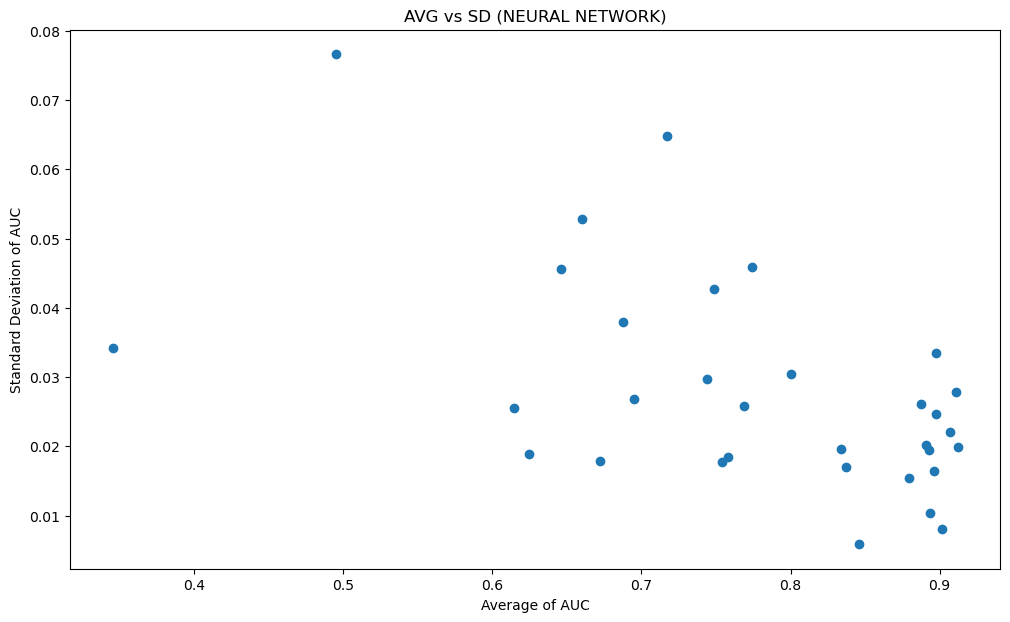

In [57]:
plt.figure(figsize=(12,7))
plt.scatter(results_df['AUC AVG'], results_df['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'AVG vs SD (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


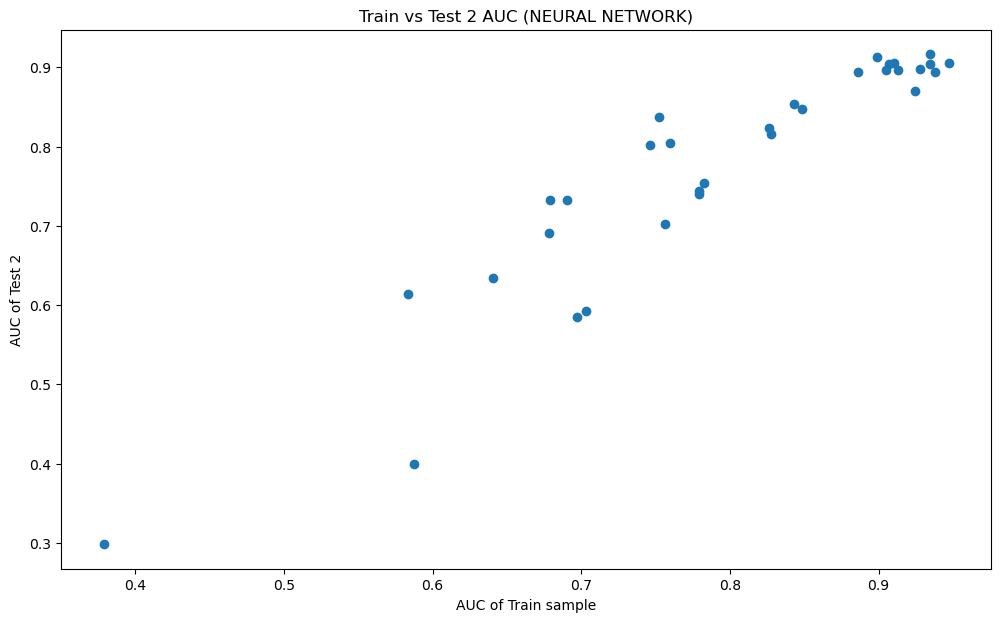

In [58]:
plt.figure(figsize=(12,7))
plt.scatter(results_df['AUC Train'], results_df['AUC Test2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train vs Test 2 AUC (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


**##########Wrongggggggg########**

*Identify the best model*

In [59]:
# Calculate the mean of AUC Test1 and AUC Test2
results_df['Mean AUC Test'] = (results_df['AUC Test1'] + results_df['AUC Test2']) / 2

# Find the row with the highest mean AUC Test score
best_model_nn = results_df.loc[results_df['Mean AUC Test'].idxmax()]

# Print the best model information
print("Best Model (based on Mean AUC Test):")
print(best_model_nn)


Best Model (based on Mean AUC Test):
# HL                          2
# Node                        6
Activation Function        tanh
Dropout                      0%
Batch Size                  100
AUC Train              0.934414
AUC Test1              0.886051
AUC Test2              0.916468
AUC AVG                0.912311
AUC SD                 0.019962
Mean AUC Test          0.901259
Name: 14, dtype: object


*parameters of the best model*

In [60]:
# hyperparameters of the best model
best_n_layers = int(best_model_nn['# HL'])
best_n_nodes = int(best_model_nn['# Node'])
best_activation = best_model_nn['Activation Function']
best_dropout = float(best_model_nn['Dropout'].strip('%')) / 100.0
best_batch_size = int(best_model_nn['Batch Size'])


*re-run the model with optimum parameters*

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# best model with optimum parameters
nn_best_model = Sequential()
nn_best_model.add(Dense(best_n_nodes, activation=best_activation, input_shape=(X_train.shape[1],)))
for _ in range(best_n_layers - 1):
    nn_best_model.add(Dense(best_n_nodes, activation=best_activation))
    if best_dropout < 1.0:
        nn_best_model.add(Dropout(best_dropout))
nn_best_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
nn_best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the best model on the entire training set
nn_best_model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)

nn_best_model.save('nn_best_model.keras')


Epoch 1/20
8/8 [==============================] - 1s 2ms/step - loss: 0.6635 - auc: 0.6242
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 0.6145 - auc: 0.7065
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 0.5741 - auc: 0.7677
Epoch 4/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5413 - auc: 0.8070
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5133 - auc: 0.8356
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4906 - auc: 0.8548
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4716 - auc: 0.8686
Epoch 8/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4552 - auc: 0.8779
Epoch 9/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4403 - auc: 0.8877
Epoch 10/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4273 - auc: 0.8942
Epoch 11/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4148 - auc: 0.90

*Slide 15*

6/6 [==============================] - 0s 2ms/step
AUC on Train: 0.9360612904654356
AUC on Test 1: 0.8572463768115942
AUC on Test 2: 0.9228174603174603


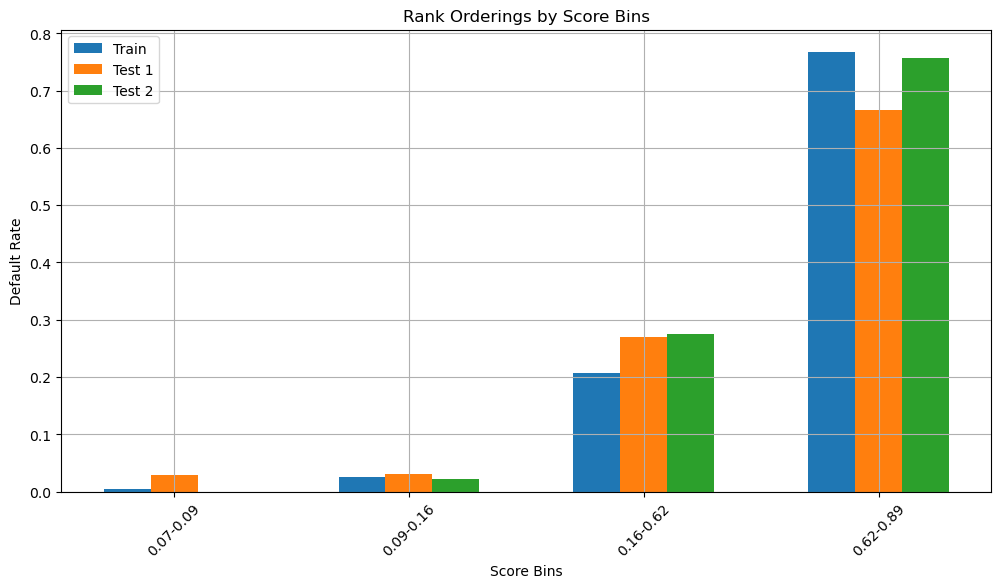

In [62]:
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC on each sample
y_train_pred = nn_best_model.predict(X_train)
y_test1_pred = nn_best_model.predict(X_test1)
y_test2_pred = nn_best_model.predict(X_test2)

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = y_train_pred.reshape(-1)
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Calculate the value ranges for each bin
bin_ranges = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Apply the same thresholds to test samples
test1_scores = y_test1_pred.reshape(-1)
test2_scores = y_test2_pred.reshape(-1)

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
    default_rates = []
    for i in range(len(bins) - 1):
        mask = (scores >= bins[i]) & (scores <= bins[i + 1])
        if np.sum(mask) > 0:
            default_rate = np.sum(y[mask]) / np.sum(mask)
            default_rates.append(default_rate)
        else:
            default_rates.append(0.0)
    return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)

x_indexes = np.arange(len(bin_ranges))

plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, bin_ranges, rotation=45)  # Display bin ranges on the x-axis
plt.legend()
plt.grid(True)
plt.show()


**Choose the best model among NN and XGB**

*compare average accuracy scores of both best models*

In [63]:
best_model_xgb

# Trees                      50
LR                          0.1
Subsample %               80.0%
Features                 100.0%
% Weight of Default          10
AUC Train                   1.0
AUC Test 1             0.907609
AUC Test 2             0.934524
AUC AVG                0.947378
AUC SD                 0.038798
Name: 59, dtype: object

In [64]:
best_model_nn

# HL                          2
# Node                        6
Activation Function        tanh
Dropout                      0%
Batch Size                  100
AUC Train              0.934414
AUC Test1              0.886051
AUC Test2              0.916468
AUC AVG                0.912311
AUC SD                 0.019962
Mean AUC Test          0.901259
Name: 14, dtype: object

In [65]:
# AUC scores from best_model_row
auc_test1_xgb = best_model_xgb['AUC Test 1']
auc_test2_xgb = best_model_xgb['AUC Test 2']

# average AUC score for best_model_row
avg_auc_xgb = (auc_test1_xgb + auc_test2_xgb) / 2
print("Avg AUC value of XGB Model :",avg_auc_xgb)

# AUC scores from best_model_select
auc_test1_nn = best_model_nn['AUC Test1']
auc_test2_nn = best_model_nn['AUC Test2']

# average AUC score for best_model_select
avg_auc_nn = (auc_test1_nn + auc_test2_nn) / 2
print("Avg AUC value of NN Model :",avg_auc_nn)

# Determine the best model and label the AUC values
if avg_auc_xgb > avg_auc_nn:
    best_model = "XGB Model"  # XGBoost model is better
    best_avg_auc = avg_auc_xgb
    model_label = "Avg AUC value of "
else:
    best_model = "NN Model"  # Neural Network model is better
    best_avg_auc = avg_auc_nn
    model_label = "Avg AUC value of "


print(f"The best model is {best_model} with {model_label}: {best_avg_auc:.5f}")


Avg AUC value of XGB Model : 0.9210662525879916
Avg AUC value of NN Model : 0.9012594893029675
The best model is XGB Model with Avg AUC value of : 0.92107


<span style="font-size:20px;">**Strategy**</span>


**Portfolios default rate - each strategy - each time frame**

In [66]:
X = df3.drop(['customer_ID','S_2','target'], axis=1)
y = df3['target']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [67]:
# Get predictions for the train dataset
xgb_predictions_train = xgb_best_model.predict(X_train)

# Get predictions for the test1 dataset
xgb_predictions_test1 = xgb_best_model.predict(X_test1)

# Get predictions for the test2 dataset
xgb_predictions_test2 = xgb_best_model.predict(X_test2)

# Get predicted probabilities for the train dataset
xgb_probs_train = xgb_best_model.predict_proba(X_train)

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = xgb_best_model.predict_proba(X_test1)

# Get predicted probabilities for the test2 dataset
xgb_probs_test2 = xgb_best_model.predict_proba(X_test2)


In [68]:
import numpy as np
import pandas as pd

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_train = []
portfolio_revenues_train = []
applicant_counts_train = []

# Choose your desired spend and balance features for the training data
spend_feature_train = X_train['S_3']
balance_feature_train = X_train['B_10']

# Get the date feature "S_2" from df3
date_feature_train = df3['S_2']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the training data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_train = X_train[(date_feature_train >= start_date) & (date_feature_train <= end_date)]
average_spend_train = np.mean(filtered_data_train['S_3'])
average_balance_train = np.mean(filtered_data_train['B_10'])

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_train = average_balance_train * 0.02 + average_spend_train * 0.001

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_train = monthly_revenue_train * 12

# Iterate through the thresholds for the training data
for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_train = xgb_probs_train[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the training data
    total_applicants_train = len(accepted_indices_train)

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_train = np.sum(y_train[accepted_indices_train])

    # Calculate the default rate among all applicants for the training data
    default_rate_train = defaulted_applicants_train / total_applicants_train

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)

    # Append results to the lists for the training data
    default_rates_train.append(default_rate_train)
    portfolio_revenues_train.append(portfolio_revenue_value_train)
    applicant_counts_train.append(total_applicants_train)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Training Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_train[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_train[i]:.2f}, Number of Applicants: {applicant_counts_train[i]}")


Training Data - Threshold: 0.1, Default Rate: 0.00%, Portfolio Revenue: $17.91, Number of Applicants: 774
Training Data - Threshold: 0.2, Default Rate: 0.00%, Portfolio Revenue: $20.36, Number of Applicants: 774
Training Data - Threshold: 0.3, Default Rate: 0.00%, Portfolio Revenue: $21.34, Number of Applicants: 774
Training Data - Threshold: 0.4, Default Rate: 0.00%, Portfolio Revenue: $22.20, Number of Applicants: 774
Training Data - Threshold: 0.5, Default Rate: 0.00%, Portfolio Revenue: $22.47, Number of Applicants: 774
Training Data - Threshold: 0.6, Default Rate: 0.00%, Portfolio Revenue: $22.55, Number of Applicants: 774
Training Data - Threshold: 0.7, Default Rate: 0.00%, Portfolio Revenue: $22.59, Number of Applicants: 774
Training Data - Threshold: 0.8, Default Rate: 0.00%, Portfolio Revenue: $22.59, Number of Applicants: 774
Training Data - Threshold: 0.9, Default Rate: 0.13%, Portfolio Revenue: $22.63, Number of Applicants: 774
Training Data - Threshold: 1.0, Default Rate: 

Boolean Series key will be reindexed to match DataFrame index.


In [69]:
import numpy as np
import pandas as pd

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test_1 data
default_rates_test1 = []
portfolio_revenues_test1 = []
applicant_counts_test1 = []

# Choose your desired spend and balance features for the test_1 data
spend_feature_test1 = X_test1['S_3']
balance_feature_test1 = X_test1['B_10']

# Get the date feature "S_2" from df3
date_feature_test1 = df3['S_2']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the test_1 data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test1 = X_test1[(date_feature_test1 >= start_date) & (date_feature_test1 <= end_date)]
average_spend_test1 = np.mean(filtered_data_test1['S_3'])
average_balance_test1 = np.mean(filtered_data_test1['B_10'])

# Calculate the monthly revenue for 1 customer for the test_1 data
monthly_revenue_test1 = average_balance_test1 * 0.02 + average_spend_test1 * 0.001

# Calculate the expected annual revenue for the test_1 data over the next 12 months
expected_revenue_test1 = monthly_revenue_test1 * 12

# Iterate through the thresholds for the test_1 data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test_1 data
    accepted_indices_test1 = xgb_probs_test1[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test_1 data
    total_applicants_test1 = len(accepted_indices_test1)

    # Calculate the number of applicants who defaulted for the test_1 data
    defaulted_applicants_test1 = np.sum(y_test1[accepted_indices_test1])

    # Calculate the default rate among all applicants for the test_1 data
    default_rate_test1 = defaulted_applicants_test1 / total_applicants_test1

    # Calculate the portfolio revenue for the test_1 data
    portfolio_revenue_value_test1 = np.sum(expected_revenue_test1 * accepted_indices_test1)

    # Append results to the lists for the test_1 data
    default_rates_test1.append(default_rate_test1)
    portfolio_revenues_test1.append(portfolio_revenue_value_test1)
    applicant_counts_test1.append(total_applicants_test1)

# Print the results for each threshold for the test_1 data
for i, threshold in enumerate(thresholds):
    print(f"Test_1 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test1[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test1[i]:.2f}, Number of Applicants: {applicant_counts_test1[i]}")


Test_1 Data - Threshold: 0.1, Default Rate: 0.60%, Portfolio Revenue: $3.25, Number of Applicants: 166
Test_1 Data - Threshold: 0.2, Default Rate: 3.01%, Portfolio Revenue: $3.76, Number of Applicants: 166
Test_1 Data - Threshold: 0.3, Default Rate: 3.61%, Portfolio Revenue: $4.07, Number of Applicants: 166
Test_1 Data - Threshold: 0.4, Default Rate: 3.61%, Portfolio Revenue: $4.15, Number of Applicants: 166
Test_1 Data - Threshold: 0.5, Default Rate: 4.22%, Portfolio Revenue: $4.27, Number of Applicants: 166
Test_1 Data - Threshold: 0.6, Default Rate: 5.42%, Portfolio Revenue: $4.38, Number of Applicants: 166
Test_1 Data - Threshold: 0.7, Default Rate: 6.63%, Portfolio Revenue: $4.50, Number of Applicants: 166
Test_1 Data - Threshold: 0.8, Default Rate: 7.83%, Portfolio Revenue: $4.70, Number of Applicants: 166
Test_1 Data - Threshold: 0.9, Default Rate: 12.65%, Portfolio Revenue: $5.25, Number of Applicants: 166
Test_1 Data - Threshold: 1.0, Default Rate: 27.71%, Portfolio Revenue: $

Boolean Series key will be reindexed to match DataFrame index.


In [70]:
import numpy as np
import pandas as pd

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test_2 data
default_rates_test2 = []
portfolio_revenues_test2 = []
applicant_counts_test2 = []

# Choose your desired spend and balance features for the test_2 data
spend_feature_test2 = X_test2['S_3']
balance_feature_test2 = X_test2['B_10']

# Get the date feature "S_2" from df3
date_feature_test2 = df3['S_2']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the test_2 data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test2 = X_test2[(date_feature_test2 >= start_date) & (date_feature_test2 <= end_date)]
average_spend_test2 = np.mean(filtered_data_test2['S_3'])
average_balance_test2 = np.mean(filtered_data_test2['B_10'])

# Calculate the monthly revenue for 1 customer for the test_2 data
monthly_revenue_test2 = average_balance_test2 * 0.02 + average_spend_test2 * 0.001

# Calculate the expected annual revenue for the test_2 data over the next 12 months
expected_revenue_test2 = monthly_revenue_test2 * 12

# Iterate through the thresholds for the test_2 data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test_2 data
    accepted_indices_test2 = xgb_probs_test2[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test_2 data
    total_applicants_test2 = len(accepted_indices_test2)

    # Calculate the number of applicants who defaulted for the test_2 data
    defaulted_applicants_test2 = np.sum(y_test2[accepted_indices_test2])

    # Calculate the default rate among all applicants for the test_2 data
    default_rate_test2 = defaulted_applicants_test2 / total_applicants_test2

    # Calculate the portfolio revenue for the test_2 data
    portfolio_revenue_value_test2 = np.sum(expected_revenue_test2 * accepted_indices_test2)

    # Append results to the lists for the test_2 data
    default_rates_test2.append(default_rate_test2)
    portfolio_revenues_test2.append(portfolio_revenue_value_test2)
    applicant_counts_test2.append(total_applicants_test2)

# Print the results for each threshold for the test_2 data
for i, threshold in enumerate(thresholds):
    print(f"Test_2 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test2[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test2[i]:.2f}, Number of Applicants: {applicant_counts_test2[i]}")


Test_2 Data - Threshold: 0.1, Default Rate: 0.00%, Portfolio Revenue: $3.77, Number of Applicants: 166
Test_2 Data - Threshold: 0.2, Default Rate: 0.60%, Portfolio Revenue: $4.10, Number of Applicants: 166
Test_2 Data - Threshold: 0.3, Default Rate: 2.41%, Portfolio Revenue: $4.43, Number of Applicants: 166
Test_2 Data - Threshold: 0.4, Default Rate: 2.41%, Portfolio Revenue: $4.43, Number of Applicants: 166
Test_2 Data - Threshold: 0.5, Default Rate: 2.41%, Portfolio Revenue: $4.55, Number of Applicants: 166
Test_2 Data - Threshold: 0.6, Default Rate: 3.61%, Portfolio Revenue: $4.76, Number of Applicants: 166
Test_2 Data - Threshold: 0.7, Default Rate: 3.61%, Portfolio Revenue: $4.92, Number of Applicants: 166
Test_2 Data - Threshold: 0.8, Default Rate: 6.63%, Portfolio Revenue: $5.17, Number of Applicants: 166
Test_2 Data - Threshold: 0.9, Default Rate: 10.84%, Portfolio Revenue: $5.66, Number of Applicants: 166
Test_2 Data - Threshold: 1.0, Default Rate: 24.10%, Portfolio Revenue: $

Boolean Series key will be reindexed to match DataFrame index.
